In [4]:
import os
import sys
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm
import scipy.io

sys.path.append('/home/feldheimlab/population-encoding-main/')

from Experiment import *


In [5]:
wd = '/media/feldheimlab/Seagate Expansion Drive/processedL5/2023-02-03-0/data001,data002,data003,data004,data005,data006,data007,data008,data009,data010,data011/'

asdf = scipy.io.loadmat(wd + 'asdf.mat')['asdf_raw']
IDs = scipy.io.loadmat(wd + 'asdf.mat')['IDs']
location = scipy.io.loadmat(wd + 'asdf.mat')['location']
basicinfo  = scipy.io.loadmat(wd + 'basicinfo.mat')
eisummary = scipy.io.loadmat(wd + 'eisummary.mat')
xy = scipy.io.loadmat(wd + 'xy.mat')
datasets = np.concatenate([[0],np.squeeze(scipy.io.loadmat(wd + 'segmentlengths.mat')['segmentseparations'])])/1000
rise = np.squeeze(scipy.io.loadmat(wd + 'ttlTimes.mat')['ttlTimes'])/1000

wd2 = '/media/feldheimlab/Seagate Expansion Drive/processedL5/2023-01-30-0/data001,data002,data003,data004,data005,data006,data007,data008,data009,data010,data011/'

asdf2 = scipy.io.loadmat(wd + 'asdf.mat')['asdf_raw']
IDs2 = scipy.io.loadmat(wd + 'asdf.mat')['IDs']
location2 = scipy.io.loadmat(wd + 'asdf.mat')['location']
basicinfo2  = scipy.io.loadmat(wd + 'basicinfo.mat')
eisummary2 = scipy.io.loadmat(wd + 'eisummary.mat')
xy2 = scipy.io.loadmat(wd + 'xy.mat')
datasets2 = np.concatenate([[0],np.squeeze(scipy.io.loadmat(wd + 'segmentlengths.mat')['segmentseparations'])])/1000
rise2 = np.squeeze(scipy.io.loadmat(wd + 'ttlTimes.mat')['ttlTimes'])/1000

/media/feldheimlab/Seagate Expansion Drive/processedL5/2023-02-03-0/data001,data002,data003,data004,data005,data006,data007,data008,data009,data010,data011/
	Loading xy.mat with SciPy
Surface definition (SurfaceContour.mat) does not exist
	Loading xy.mat with SciPy
Surface definition (SurfaceContour.mat) does not exist
197/197 neurons are in the SC
	Loading AuditorySpotSummary_2.mat with SciPy
	Loading AuditorySpotSummary_2.mat with SciPy
	Loading AuditorySpotSummary_7.mat with SciPy
	Loading AuditorySpotSummary_7.mat with SciPy
101/197 auditory neurons are in the SC
75/197 auditory neurons are in the SC
67/130 auditory neurons are in the SC
89/130 auditory neurons are in the SC


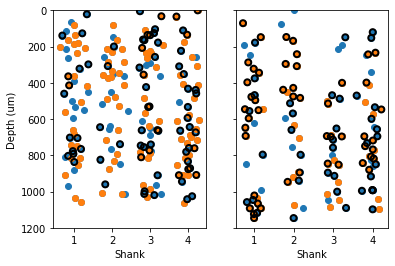

In [8]:

#load the data for each of the datsets
print(wd)
e = Experiment(wd) # load the experimental data
# e.resetUseIDs()
e2 = Experiment(wd2) # load the experimental data

fig, axs = plt.subplots(1,2)


print('{0}/{1} neurons are in the SC'.format(e.nNeu, e.nNeuTotal))
axs[0].scatter(e.y[e.useIDs], e.neurons['depth'][e.useIDs], label='neurons')
axs[1].scatter(e2.y[e2.useIDs], e2.neurons['depth'][e2.useIDs], label='neurons')

posneu1 = np.where(e2.loadData('AuditorySpotSummary_2.mat')['posneu'])[0]
posneu2 = np.where(e.loadData('AuditorySpotSummary_2.mat')['posneu'])[0]
posneu3 = np.where(e2.loadData('AuditorySpotSummary_7.mat')['posneu'])[0]
posneu4 = np.where(e.loadData('AuditorySpotSummary_7.mat')['posneu'])[0]

axs[0].scatter(e.y[posneu2], e.neurons['depth'][posneu2], label='posneu pre')
axs[0].scatter(e.y[posneu4], e.neurons['depth'][posneu4], label='posneu post', edgecolor='black', linewidth=2, facecolor='None')

axs[1].scatter(e2.y[posneu1], e2.neurons['depth'][posneu1], label='posneu pre')
axs[1].scatter(e2.y[posneu3], e2.neurons['depth'][posneu3], label='posneu post', edgecolor='black', linewidth=2, facecolor='None')

print('{0}/{1} auditory neurons are in the SC'.format(len(posneu2), e.nNeuTotal))
print('{0}/{1} auditory neurons are in the SC'.format(len(posneu4), e.nNeuTotal))

print('{0}/{1} auditory neurons are in the SC'.format(len(posneu1), e2.nNeuTotal))
print('{0}/{1} auditory neurons are in the SC'.format(len(posneu3), e2.nNeuTotal))

# e.removeWaveforms(5) #remove axon-like waveforms; class 5 waveforms
# print('{0}/{1} neurons are in the SC and have proper waveforms'.format(e.nNeu, e.nNeuTotal))
# plt.scatter(e.y[e.useIDs], e.neurons['depth'][e.useIDs], label='Non-axonal')

# compare useIDs and those that area visual responive
# e.getVisNeurons()
# vis_ids = keepsimlist(e.useIDs, e.sig_vis)
# print('{0}/{1} neurons are in the SC, have proper waveforms, and visually responsive'.format(len(vis_ids), e.nNeuTotal))
# plt.scatter(e.y[vis_ids], e.neurons['depth'][vis_ids], label='visual')

axs[0].set_ylim([1200,0])
axs[0].set_ylabel('Depth (um)')
axs[0].set_xlabel('Shank')
axs[0].set_xticks([0,200,400,600],[1,2,3,4])

axs[1].set_ylim([1200,0])
# axs[1].set_ylabel('Depth (um)')
axs[1].set_yticklabels([])
axs[1].set_xlabel('Shank')
axs[1].set_xticks([0,200,400,600],[1,2,3,4])

plt.show()